In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figuer_format = 'svg'
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
df = pd.read_csv('data/bank_additional.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
mapping = { 'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
          'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month'] = df['month'].map(mapping)

mapping = {'yes': 1, 'no': 0}
df.y = df.y.map(mapping)
print(df.y)

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


<AxesSubplot:xlabel='month'>

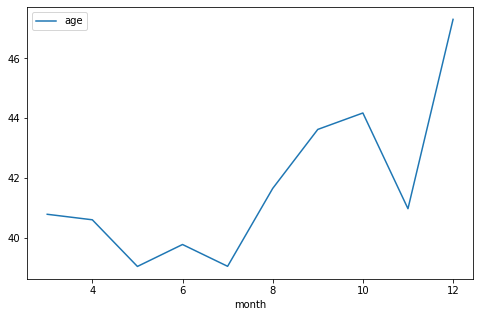

In [5]:
bank_months = df[['month', 'age']]
bank_months.groupby('month').mean().plot()

Видим, что в первой половине года в банк обращались более молодые люди, а в конце года - более старые

Нарисуем распределение месяца и возраста обратившегося и целевой функции

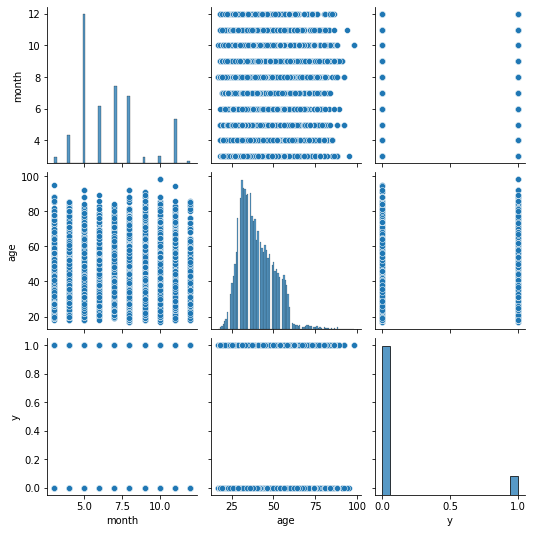

In [6]:
cols = ['month', 'age', 'y']
sns_plot = sns.pairplot(df[cols])

Нарисуем зависимость обращения в банк в зависимости от возраста функции от возраста по дням недели

<AxesSubplot:xlabel='age', ylabel='day_of_week'>

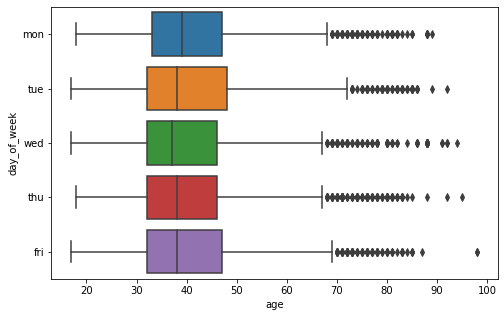

In [7]:
credit_age = df[['day_of_week'] + ['age']]
sns.boxplot(y='day_of_week', x='age', data=df, orient='h')

Нарисуем зависимость успешного обращения в банк в зависимости от возраста функции от возраста по дням недели

<AxesSubplot:xlabel='age', ylabel='day_of_week'>

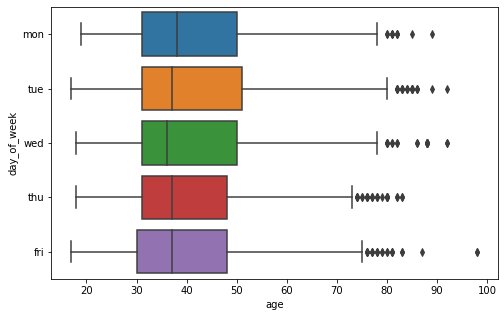

In [8]:
sns.boxplot(y='day_of_week', x='age', data=df[df.y==1], orient='h')

построим распределение числа успешных обращений в банк от работы и статуса

<AxesSubplot:xlabel='marital', ylabel='job'>

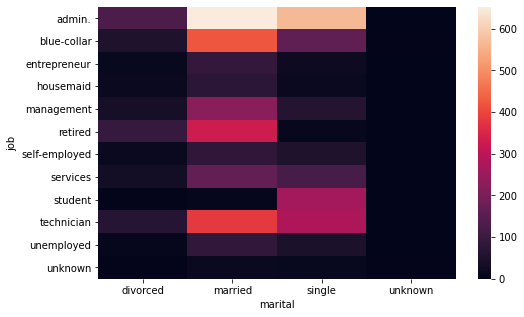

In [9]:
country_type_sales = df.pivot_table(
    index='job',
    columns='marital',
    values='y',
    aggfunc=sum
).fillna(0).applymap(int)
sns.heatmap(country_type_sales)

Видим, что со статусом 'unknown' не было ни одного успешного обращения. Самые успешные обращения были у женатых людей. Причем администраторы были самыми успешными в обращениях.

Построим распределение age

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

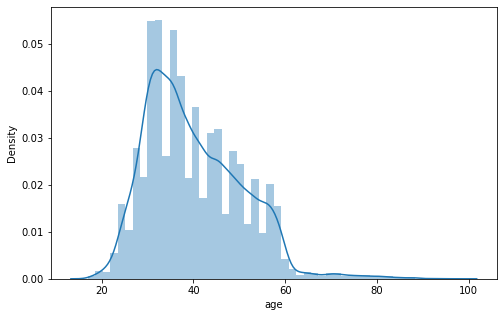

In [10]:
sns.distplot(df.age)

Видим, что основной возраст обращавшихся в банк - от 25 до 55 лет